Documentation for the Master thesis "Fanfiction Semantics - A Quantitative Analysis of Sensitive Topics in German Fanfiction" by Julian Jacopo Häußler, Date of submission: September 19, 2022.

# 7.3 Word Embedding Model Based Sentiment Analysis C

## Overview

### - load libraries and read in data
### - extract most frequent wors
### - visualize emotional profiles

# LOAD LIBRARIES AND READ IN DATA

In [1]:
# load libraries

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import numpy as np
import math
import pickle
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

from nltk.corpus import stopwords
from collections import Counter

In [2]:
# define paths

path_data = r'C:\Users\Public\Data\Masterarbeit\data_bawl'
path_models = r'C:\Users\Public\Data\Masterarbeit\models_3.0'
path_pickled = r'C:\Users\Public\Data\Masterarbeit\results\bawl_cluster'
path_sentiment = r'C:\Users\Public\Data\Masterarbeit\results\7.3 Word Embedding Model based Sentiment Analyses'

In [3]:
# load models

modelPotter = KeyedVectors.load(path_models + '\\modelPotter2021H.kv')

modelBiss = KeyedVectors.load(path_models + '\\modelBiss2021H.kv')

modelWarriorCats = KeyedVectors.load(path_models + '\\modelWarriorCats2021H.kv')

modelDFFF = KeyedVectors.load(path_models + '\\modelDFFF2021H.kv')

modelMittelerde = KeyedVectors.load(path_models + '\\modelMittelerde2021H.kv')

modelJackson = KeyedVectors.load(path_models + '\\modelJackson2021H.kv')

modelPanem = KeyedVectors.load(path_models + '\\modelPanem2021H.kv')

modelPotterOriginals = KeyedVectors.load(path_models + '\\modelPotterOriginalsH.kv')

In [4]:
# load corpora

with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\Potter2021_words.pkl', 'rb') as f:
    Potter_words = pickle.load(f)
    
with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\Biss2021_words.pkl', 'rb') as f:
    Biss_words = pickle.load(f)

with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\WarriorCats2021_words.pkl', 'rb') as f:
    WarriorCats_words = pickle.load(f)
    
with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\DFFF2021_words.pkl', 'rb') as f:
    DFFF_words = pickle.load(f)

with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\Mittelerde2021_words.pkl', 'rb') as f:
    Mittelerde_words = pickle.load(f)

with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\Jackson2021_words.pkl', 'rb') as f:
    Jackson_words = pickle.load(f)

with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\Panem2021_words.pkl', 'rb') as f:
    Panem_words = pickle.load(f)

with open(r'C:\Users\Public\Data\Masterarbeit\corpora_3.0\\PotterOriginals_words.pkl', 'rb') as f:
    PotterOriginals_words = pickle.load(f)

# EXTRACT MOST FREQUENT WORDS

In [5]:
stopwords_german = stopwords.words("german")

In [6]:
Potter_words_clean = [word for word in Potter_words if word not in stopwords_german]

Potter_top500 = Counter(Potter_words_clean).most_common(500)

Potter_top500_words = [i[0] for i in Potter_top500]

In [7]:
Potter_top500_words[:5]

['“', '„', 'harry', 'sehen', 'sagen']

In [8]:
Biss_words_clean = [word for word in Biss_words if word not in stopwords_german]

Biss_top500 = Counter(Biss_words_clean).most_common(500)

Biss_top500_words = [i[0] for i in Biss_top500]

In [9]:
WarriorCats_words_clean = [word for word in WarriorCats_words if word not in stopwords_german]

WarriorCats_top500 = Counter(WarriorCats_words_clean).most_common(500)

WarriorCats_top500_words = [i[0] for i in WarriorCats_top500]

In [10]:
DFFF_words_clean = [word for word in DFFF_words if word not in stopwords_german]

DFFF_top500 = Counter(DFFF_words_clean).most_common(500)

DFFF_top500_words = [i[0] for i in DFFF_top500]

In [11]:
Mittelerde_words_clean = [word for word in Mittelerde_words if word not in stopwords_german]

Mittelerde_top500 = Counter(Mittelerde_words_clean).most_common(500)

Mittelerde_top500_words = [i[0] for i in Mittelerde_top500]

In [12]:
Jackson_words_clean = [word for word in Jackson_words if word not in stopwords_german]

Jackson_top500 = Counter(Jackson_words_clean).most_common(500)

Jackson_top500_words = [i[0] for i in Jackson_top500]

In [13]:
Panem_words_clean = [word for word in Panem_words if word not in stopwords_german]

Panem_top500 = Counter(Panem_words_clean).most_common(500)

Panem_top500_words = [i[0] for i in Panem_top500]

In [14]:
PotterOriginals_words_clean = [word for word in PotterOriginals_words if word not in stopwords_german]

PotterOriginals_top500 = Counter(PotterOriginals_words_clean).most_common(500)

PotterOriginals_top500_words = [i[0] for i in PotterOriginals_top500]

In [15]:
PotterOriginals_top500_words[:5]

['harry', 'sagen', ',', '–', '…']

# VISUALIZE EMOTIONAL PROFILES

The following code blocks are taken from Brottrager et al.'s "Character Shifts in Harry Potter Fanfictions", the relevant Jupyter Notebook can be found under https://github.com/jbrottrager/character-shifts-HPFFS/blob/main/scripts/10_emotionalProfiles.ipynb (last viewed: 2022/09/18)


In [16]:
# Define emotional potential function:

def emotional_potential(valence, arousal):
    return abs(valence) * arousal

In [17]:
# Define low/high valence and low/high arousal centroids

# Potter
with open(path_pickled + '\\high_val_Potter.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_Potter = np.average([modelPotter.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_Potter.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_Potter = np.average([modelPotter.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_Potter.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_Potter = np.average([modelPotter.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_Potter.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_Potter = np.average([modelPotter.get_vector(word) for word in low_arousal_cluster], axis=0)

In [18]:
# Define low/high valence and low/high arousal centroids

# Biss
with open(path_pickled + '\\high_val_Biss.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_Biss = np.average([modelBiss.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_Biss.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_Biss = np.average([modelBiss.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_Biss.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_Biss = np.average([modelBiss.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_Biss.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_Biss = np.average([modelBiss.get_vector(word) for word in low_arousal_cluster], axis=0)

In [19]:
# Define low/high valence and low/high arousal centroids

# WarriorCats
with open(path_pickled + '\\high_val_WarriorCats.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_WarriorCats = np.average([modelWarriorCats.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_WarriorCats.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_WarriorCats = np.average([modelWarriorCats.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_WarriorCats.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_WarriorCats = np.average([modelWarriorCats.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_WarriorCats.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_WarriorCats = np.average([modelWarriorCats.get_vector(word) for word in low_arousal_cluster], axis=0)

In [20]:
# Define low/high valence and low/high arousal centroids

# DFFF
with open(path_pickled + '\\high_val_DFFF.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_DFFF = np.average([modelDFFF.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_DFFF.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_DFFF = np.average([modelDFFF.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_DFFF.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_DFFF = np.average([modelDFFF.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_DFFF.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_DFFF = np.average([modelDFFF.get_vector(word) for word in low_arousal_cluster], axis=0)

In [21]:
# Define low/high valence and low/high arousal centroids

# Mittelerde
with open(path_pickled + '\\high_val_Mittelerde.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_Mittelerde = np.average([modelMittelerde.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_Mittelerde.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_Mittelerde = np.average([modelMittelerde.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_Mittelerde.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_Mittelerde = np.average([modelMittelerde.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_Mittelerde.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_Mittelerde = np.average([modelMittelerde.get_vector(word) for word in low_arousal_cluster], axis=0)

In [22]:
# Define low/high valence and low/high arousal centroids

# Jackson
with open(path_pickled + '\\high_val_Jackson.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_Jackson = np.average([modelJackson.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_Jackson.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_Jackson = np.average([modelJackson.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_Jackson.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_Jackson = np.average([modelJackson.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_Jackson.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_Jackson = np.average([modelJackson.get_vector(word) for word in low_arousal_cluster], axis=0)

In [23]:
# Define low/high valence and low/high arousal centroids

# Panem
with open(path_pickled + '\\high_val_Panem.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_Panem = np.average([modelPanem.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_Panem.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_Panem = np.average([modelPanem.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_Panem.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_Panem = np.average([modelPanem.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_Panem.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_Panem = np.average([modelPanem.get_vector(word) for word in low_arousal_cluster], axis=0)

In [24]:
# Define low/high valence and low/high arousal centroids

# Panem
with open(path_pickled + '\\high_val_Panem.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_Panem = np.average([modelPanem.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_Panem.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_Panem = np.average([modelPanem.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_Panem.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_Panem = np.average([modelPanem.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_Panem.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_Panem = np.average([modelPanem.get_vector(word) for word in low_arousal_cluster], axis=0)

In [25]:
# Define low/high valence and low/high arousal centroids

# PotterOriginals
with open(path_pickled + '\\high_val_PotterOriginals.pkl', 'rb') as f:
    high_valence_cluster = pickle.load(f)
centroid_high_valence_PotterOriginals = np.average([modelPotterOriginals.get_vector(word) for word in high_valence_cluster], axis=0)

with open(path_pickled + '\\low_val_PotterOriginals.pkl', 'rb') as f:
    low_valence_cluster = pickle.load(f)
centroid_low_valence_PotterOriginals = np.average([modelPotterOriginals.get_vector(word) for word in low_valence_cluster], axis=0)

with open(path_pickled + '\\high_arousal_PotterOriginals.pkl', 'rb') as f:
    high_arousal_cluster = pickle.load(f)
centroid_high_arousal_PotterOriginals = np.average([modelPotterOriginals.get_vector(word) for word in high_arousal_cluster], axis=0)

with open(path_pickled + '\\low_arousal_PotterOriginals.pkl', 'rb') as f:
    low_arousal_cluster = pickle.load(f)
centroid_low_arousal_PotterOriginals = np.average([modelPotterOriginals.get_vector(word) for word in low_arousal_cluster], axis=0)

In [26]:
# Define emotional distance function

def emo_distance(word, model, aspect = "valence", centroid_choice = "fanfiction"):
    if centroid_choice == "Potter":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_Potter,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_Potter,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_Potter,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_Potter,model.get_vector(word)], dense_output=False)[0,1]
    
    if centroid_choice == "Biss":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_Biss,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_Biss,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_Biss,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_Biss,model.get_vector(word)], dense_output=False)[0,1]

    if centroid_choice == "WarriorCats":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_WarriorCats,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_WarriorCats,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_WarriorCats,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_WarriorCats,model.get_vector(word)], dense_output=False)[0,1]

    if centroid_choice == "DFFF":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_DFFF,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_DFFF,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_DFFF,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_DFFF,model.get_vector(word)], dense_output=False)[0,1]
            
    if centroid_choice == "Mittelerde":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_Mittelerde,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_Mittelerde,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_Mittelerde,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_Mittelerde,model.get_vector(word)], dense_output=False)[0,1]
            
    if centroid_choice == "Jackson":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_Jackson,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_Jackson,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_Jackson,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_Jackson,model.get_vector(word)], dense_output=False)[0,1]
        
    if centroid_choice == "Panem":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_Panem,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_Panem,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_Panem,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_Panem,model.get_vector(word)], dense_output=False)[0,1]

    if centroid_choice == "PotterOriginals":
        if aspect == "valence":
            high = cosine_similarity([centroid_high_valence_PotterOriginals,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_valence_PotterOriginals,model.get_vector(word)], dense_output=False)[0,1]
        if aspect == "arousal":
            high = cosine_similarity([centroid_high_arousal_PotterOriginals,model.get_vector(word)], dense_output=False)[0,1]
            low = cosine_similarity([centroid_low_arousal_PotterOriginals,model.get_vector(word)], dense_output=False)[0,1]           

    return (high - low)

In [27]:
# sensitive topics

keywords = ["angreifen","töten","küssen","erregen"]

# 1. POTTER

Minimal Valence: -0.54564327
Maximal Valence: 0.37088582
Minimal Arousal: -0.34967783
Maximal Arousal: 0.38014317
Minimal Potential: -0.034327127
Maximal Potential: 0.1822775


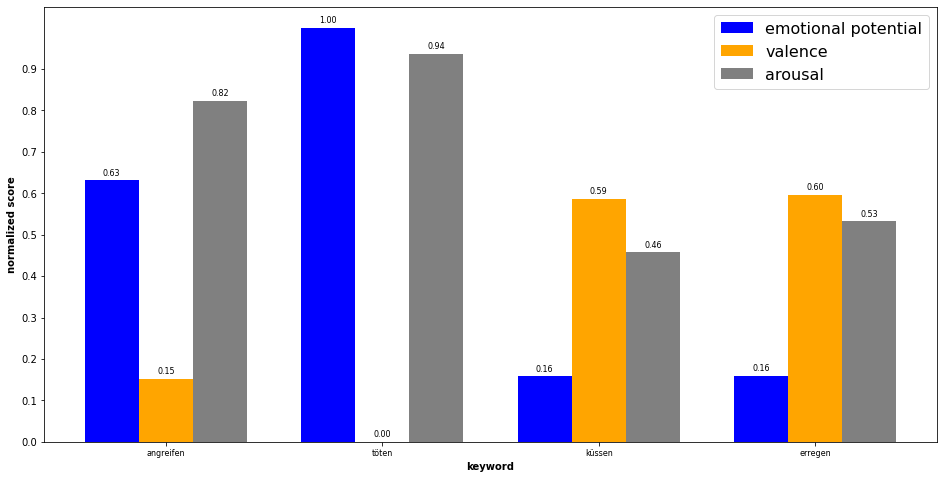

In [28]:
for keyword in keywords:
    if keyword not in Potter_top500_words:
        Potter_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_Potter = {}
valence_list = []
arousal_list = []
potential_list = []

for word in Potter_top500_words:
    try:
        valence = emo_distance(word, modelPotter, "valence", "Potter")
        valence_list.append(valence)
        arousal = emo_distance(word, modelPotter, "arousal", "Potter")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_Potter[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_Potter = min(valence_list)
max_valence_Potter = max(valence_list)
min_arousal_Potter = min(arousal_list)
max_arousal_Potter = max(arousal_list)
min_potential_Potter = min(potential_list)
max_potential_Potter = max(potential_list)

print("Minimal Valence: " + str(min_valence_Potter))
print("Maximal Valence: " + str(max_valence_Potter))
print("Minimal Arousal: " + str(min_arousal_Potter))
print("Maximal Arousal: " + str(max_arousal_Potter))
print("Minimal Potential: " + str(min_potential_Potter))
print("Maximal Potential: " + str(max_potential_Potter))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_Potter[keyword][0] - min_valence_Potter) / (max_valence_Potter - min_valence_Potter))
    arousal_list.append(float(profile_dict_Potter[keyword][1] - min_arousal_Potter) / (max_arousal_Potter - min_arousal_Potter))
    potential_list.append(float(profile_dict_Potter[keyword][2] - min_potential_Potter) / (max_potential_Potter - min_potential_Potter))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_Potter.png', dpi=300, bbox_inches = 'tight')

## 2. Biss

Minimal Valence: -0.49973366
Maximal Valence: 0.34942967
Minimal Arousal: -0.44157246
Maximal Arousal: 0.30736396
Minimal Potential: -0.11197534
Maximal Potential: 0.15360011


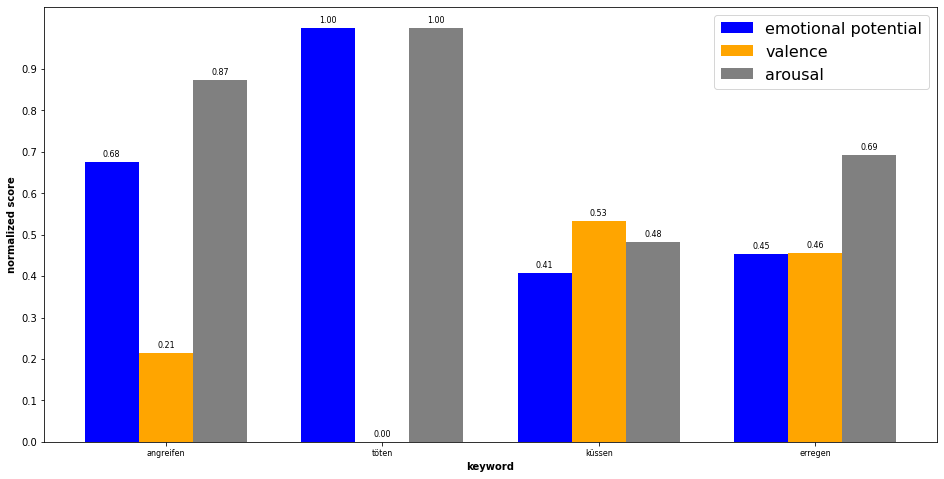

In [29]:
for keyword in keywords:
    if keyword not in Biss_top500_words:
        Biss_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_Biss = {}
valence_list = []
arousal_list = []
potential_list = []

for word in Biss_top500_words:
    try:
        valence = emo_distance(word, modelBiss, "valence", "Biss")
        valence_list.append(valence)
        arousal = emo_distance(word, modelBiss, "arousal", "Biss")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_Biss[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_Biss = min(valence_list)
max_valence_Biss = max(valence_list)
min_arousal_Biss = min(arousal_list)
max_arousal_Biss = max(arousal_list)
min_potential_Biss = min(potential_list)
max_potential_Biss = max(potential_list)

print("Minimal Valence: " + str(min_valence_Biss))
print("Maximal Valence: " + str(max_valence_Biss))
print("Minimal Arousal: " + str(min_arousal_Biss))
print("Maximal Arousal: " + str(max_arousal_Biss))
print("Minimal Potential: " + str(min_potential_Biss))
print("Maximal Potential: " + str(max_potential_Biss))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_Biss[keyword][0] - min_valence_Biss) / (max_valence_Biss - min_valence_Biss))
    arousal_list.append(float(profile_dict_Biss[keyword][1] - min_arousal_Biss) / (max_arousal_Biss - min_arousal_Biss))
    potential_list.append(float(profile_dict_Biss[keyword][2] - min_potential_Biss) / (max_potential_Biss - min_potential_Biss))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_Biss.png', dpi=300, bbox_inches = 'tight')

## 3. WarriorCats

In [30]:
# sensitive topics

keywords = ["angreifen","töten","erregen"]

Minimal Valence: -0.3879237
Maximal Valence: 0.31724417
Minimal Arousal: -0.48230618
Maximal Arousal: 0.48569328
Minimal Potential: -0.048877455
Maximal Potential: 0.052437667


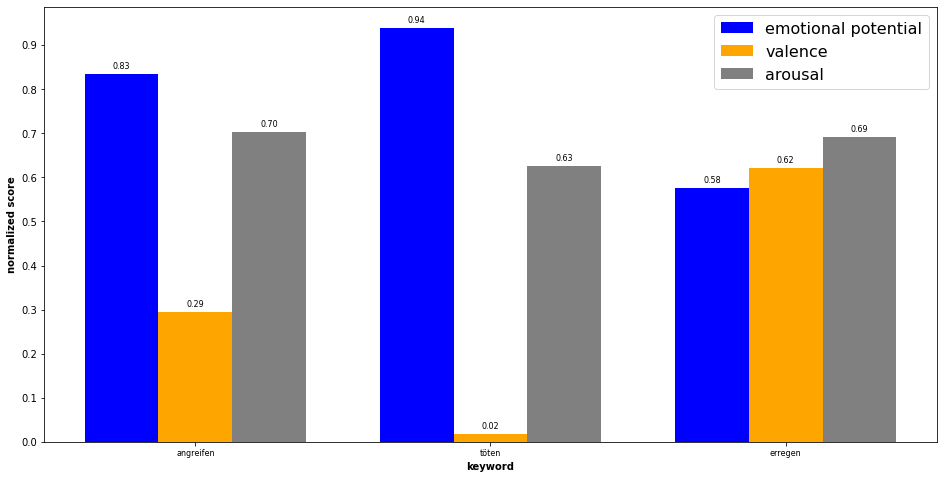

In [31]:
for keyword in keywords:
    if keyword not in WarriorCats_top500_words:
        WarriorCats_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_WarriorCats = {}
valence_list = []
arousal_list = []
potential_list = []

for word in WarriorCats_top500_words:
    try:
        valence = emo_distance(word, modelWarriorCats, "valence", "WarriorCats")
        valence_list.append(valence)
        arousal = emo_distance(word, modelWarriorCats, "arousal", "WarriorCats")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_WarriorCats[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_WarriorCats = min(valence_list)
max_valence_WarriorCats = max(valence_list)
min_arousal_WarriorCats = min(arousal_list)
max_arousal_WarriorCats = max(arousal_list)
min_potential_WarriorCats = min(potential_list)
max_potential_WarriorCats = max(potential_list)

print("Minimal Valence: " + str(min_valence_WarriorCats))
print("Maximal Valence: " + str(max_valence_WarriorCats))
print("Minimal Arousal: " + str(min_arousal_WarriorCats))
print("Maximal Arousal: " + str(max_arousal_WarriorCats))
print("Minimal Potential: " + str(min_potential_WarriorCats))
print("Maximal Potential: " + str(max_potential_WarriorCats))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_WarriorCats[keyword][0] - min_valence_WarriorCats) / (max_valence_WarriorCats - min_valence_WarriorCats))
    arousal_list.append(float(profile_dict_WarriorCats[keyword][1] - min_arousal_WarriorCats) / (max_arousal_WarriorCats - min_arousal_WarriorCats))
    potential_list.append(float(profile_dict_WarriorCats[keyword][2] - min_potential_WarriorCats) / (max_potential_WarriorCats - min_potential_WarriorCats))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_WarriorCats.png', dpi=300, bbox_inches = 'tight')

## 4. DFFF

In [32]:
# sensitive topics

keywords = ["angreifen","töten","küssen","erregen"]

Minimal Valence: -0.22598901
Maximal Valence: 0.45096338
Minimal Arousal: -0.42176563
Maximal Arousal: 0.5760336
Minimal Potential: -0.035319727
Maximal Potential: 0.08205564


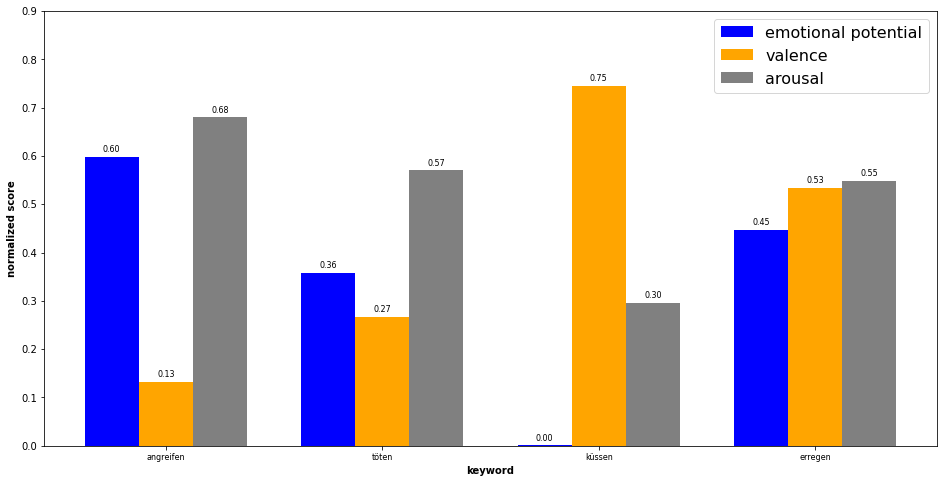

In [33]:
for keyword in keywords:
    if keyword not in DFFF_top500_words:
        DFFF_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_DFFF = {}
valence_list = []
arousal_list = []
potential_list = []

for word in DFFF_top500_words:
    try:
        valence = emo_distance(word, modelDFFF, "valence", "DFFF")
        valence_list.append(valence)
        arousal = emo_distance(word, modelDFFF, "arousal", "DFFF")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_DFFF[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_DFFF = min(valence_list)
max_valence_DFFF = max(valence_list)
min_arousal_DFFF = min(arousal_list)
max_arousal_DFFF = max(arousal_list)
min_potential_DFFF = min(potential_list)
max_potential_DFFF = max(potential_list)

print("Minimal Valence: " + str(min_valence_DFFF))
print("Maximal Valence: " + str(max_valence_DFFF))
print("Minimal Arousal: " + str(min_arousal_DFFF))
print("Maximal Arousal: " + str(max_arousal_DFFF))
print("Minimal Potential: " + str(min_potential_DFFF))
print("Maximal Potential: " + str(max_potential_DFFF))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_DFFF[keyword][0] - min_valence_DFFF) / (max_valence_DFFF - min_valence_DFFF))
    arousal_list.append(float(profile_dict_DFFF[keyword][1] - min_arousal_DFFF) / (max_arousal_DFFF - min_arousal_DFFF))
    potential_list.append(float(profile_dict_DFFF[keyword][2] - min_potential_DFFF) / (max_potential_DFFF - min_potential_DFFF))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_DFFF.png', dpi=300, bbox_inches = 'tight')

## 5. Mittelerde

Minimal Valence: -0.44617736
Maximal Valence: 0.42278352
Minimal Arousal: -0.4382277
Maximal Arousal: 0.3012056
Minimal Potential: -0.06094301
Maximal Potential: 0.13439113


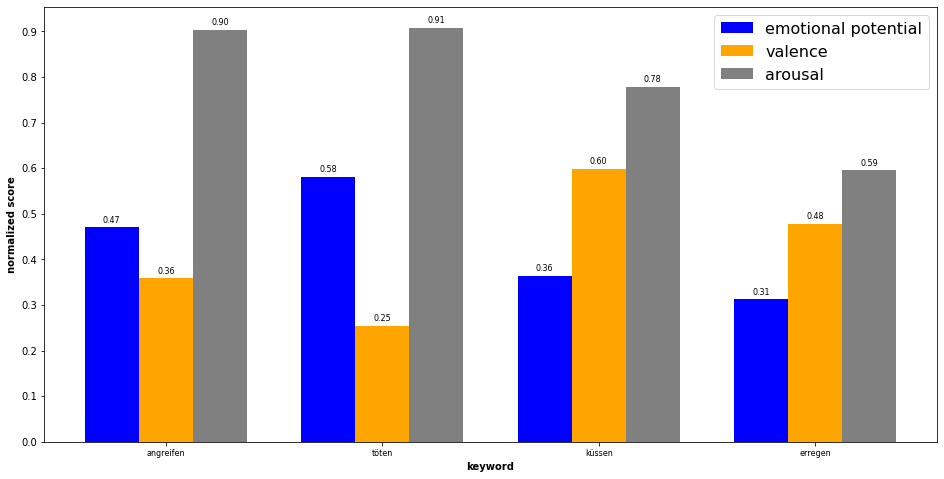

In [34]:
for keyword in keywords:
    if keyword not in Mittelerde_top500_words:
        Mittelerde_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_Mittelerde = {}
valence_list = []
arousal_list = []
potential_list = []

for word in Mittelerde_top500_words:
    try:
        valence = emo_distance(word, modelMittelerde, "valence", "Mittelerde")
        valence_list.append(valence)
        arousal = emo_distance(word, modelMittelerde, "arousal", "Mittelerde")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_Mittelerde[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_Mittelerde = min(valence_list)
max_valence_Mittelerde = max(valence_list)
min_arousal_Mittelerde = min(arousal_list)
max_arousal_Mittelerde = max(arousal_list)
min_potential_Mittelerde = min(potential_list)
max_potential_Mittelerde = max(potential_list)

print("Minimal Valence: " + str(min_valence_Mittelerde))
print("Maximal Valence: " + str(max_valence_Mittelerde))
print("Minimal Arousal: " + str(min_arousal_Mittelerde))
print("Maximal Arousal: " + str(max_arousal_Mittelerde))
print("Minimal Potential: " + str(min_potential_Mittelerde))
print("Maximal Potential: " + str(max_potential_Mittelerde))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_Mittelerde[keyword][0] - min_valence_Mittelerde) / (max_valence_Mittelerde - min_valence_Mittelerde))
    arousal_list.append(float(profile_dict_Mittelerde[keyword][1] - min_arousal_Mittelerde) / (max_arousal_Mittelerde - min_arousal_Mittelerde))
    potential_list.append(float(profile_dict_Mittelerde[keyword][2] - min_potential_Mittelerde) / (max_potential_Mittelerde - min_potential_Mittelerde))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_Mittelerde.png', dpi=300, bbox_inches = 'tight')

## 6. Jackson

Minimal Valence: -0.5231054
Maximal Valence: 0.32257152
Minimal Arousal: -0.4107099
Maximal Arousal: 0.5427405
Minimal Potential: -0.08080752
Maximal Potential: 0.19351752


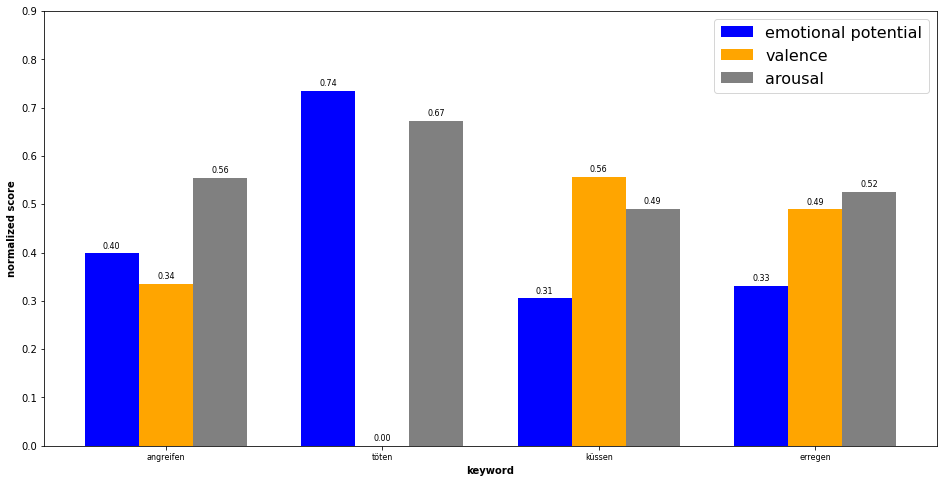

In [35]:
for keyword in keywords:
    if keyword not in Jackson_top500_words:
        Jackson_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_Jackson = {}
valence_list = []
arousal_list = []
potential_list = []

for word in Jackson_top500_words:
    try:
        valence = emo_distance(word, modelJackson, "valence", "Jackson")
        valence_list.append(valence)
        arousal = emo_distance(word, modelJackson, "arousal", "Jackson")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_Jackson[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_Jackson = min(valence_list)
max_valence_Jackson = max(valence_list)
min_arousal_Jackson = min(arousal_list)
max_arousal_Jackson = max(arousal_list)
min_potential_Jackson = min(potential_list)
max_potential_Jackson = max(potential_list)

print("Minimal Valence: " + str(min_valence_Jackson))
print("Maximal Valence: " + str(max_valence_Jackson))
print("Minimal Arousal: " + str(min_arousal_Jackson))
print("Maximal Arousal: " + str(max_arousal_Jackson))
print("Minimal Potential: " + str(min_potential_Jackson))
print("Maximal Potential: " + str(max_potential_Jackson))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_Jackson[keyword][0] - min_valence_Jackson) / (max_valence_Jackson - min_valence_Jackson))
    arousal_list.append(float(profile_dict_Jackson[keyword][1] - min_arousal_Jackson) / (max_arousal_Jackson - min_arousal_Jackson))
    potential_list.append(float(profile_dict_Jackson[keyword][2] - min_potential_Jackson) / (max_potential_Jackson - min_potential_Jackson))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_Jackson.png', dpi=300, bbox_inches = 'tight')

## 7. Panem

Minimal Valence: -0.18974005
Maximal Valence: 0.29412013
Minimal Arousal: -0.42020786
Maximal Arousal: 0.50690943
Minimal Potential: -0.04406831
Maximal Potential: 0.053061757


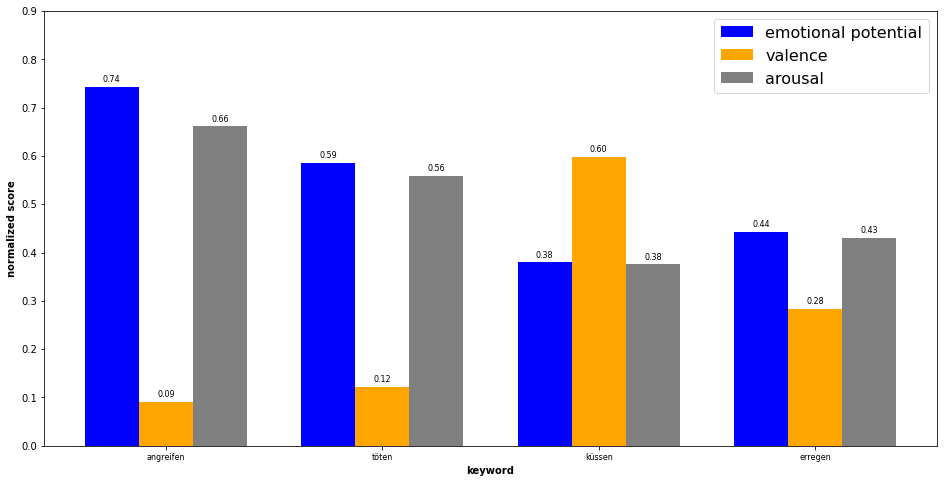

In [36]:
for keyword in keywords:
    if keyword not in Panem_top500_words:
        Panem_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_Panem = {}
valence_list = []
arousal_list = []
potential_list = []

for word in Panem_top500_words:
    try:
        valence = emo_distance(word, modelPanem, "valence", "Panem")
        valence_list.append(valence)
        arousal = emo_distance(word, modelPanem, "arousal", "Panem")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_Panem[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_Panem = min(valence_list)
max_valence_Panem = max(valence_list)
min_arousal_Panem = min(arousal_list)
max_arousal_Panem = max(arousal_list)
min_potential_Panem = min(potential_list)
max_potential_Panem = max(potential_list)

print("Minimal Valence: " + str(min_valence_Panem))
print("Maximal Valence: " + str(max_valence_Panem))
print("Minimal Arousal: " + str(min_arousal_Panem))
print("Maximal Arousal: " + str(max_arousal_Panem))
print("Minimal Potential: " + str(min_potential_Panem))
print("Maximal Potential: " + str(max_potential_Panem))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_Panem[keyword][0] - min_valence_Panem) / (max_valence_Panem - min_valence_Panem))
    arousal_list.append(float(profile_dict_Panem[keyword][1] - min_arousal_Panem) / (max_arousal_Panem - min_arousal_Panem))
    potential_list.append(float(profile_dict_Panem[keyword][2] - min_potential_Panem) / (max_potential_Panem - min_potential_Panem))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_Panem.png', dpi=300, bbox_inches = 'tight')

## 8. Potter Originals

In [37]:
# sensitive topics

keywords = ["angreifen","töten","erregen"]

Minimal Valence: -0.30698752
Maximal Valence: 0.36029926
Minimal Arousal: -0.49250364
Maximal Arousal: 0.43020803
Minimal Potential: -0.036497924
Maximal Potential: 0.10149332


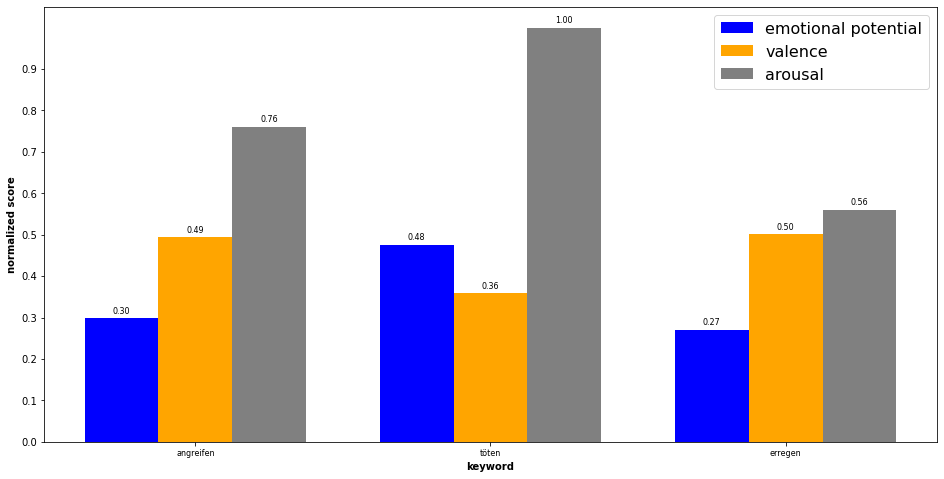

In [38]:
for keyword in keywords:
    if keyword not in PotterOriginals_top500_words:
        PotterOriginals_top500_words.append(keyword)

# Dictionary containing valence/arousal/emotional potential for top 100 most frequent characters:
    
profile_dict_PotterOriginals = {}
valence_list = []
arousal_list = []
potential_list = []

for word in PotterOriginals_top500_words:
    try:
        valence = emo_distance(word, modelPotterOriginals, "valence", "PotterOriginals")
        valence_list.append(valence)
        arousal = emo_distance(word, modelPotterOriginals, "arousal", "PotterOriginals")
        arousal_list.append(arousal)
        potential = emotional_potential(valence, arousal)
        potential_list.append(potential)
        profile_dict_PotterOriginals[word] = (valence, arousal, potential)
    except:
        continue

# Min/Max values of valence/arousal/emotional potential:

min_valence_PotterOriginals = min(valence_list)
max_valence_PotterOriginals = max(valence_list)
min_arousal_PotterOriginals = min(arousal_list)
max_arousal_PotterOriginals = max(arousal_list)
min_potential_PotterOriginals = min(potential_list)
max_potential_PotterOriginals = max(potential_list)

print("Minimal Valence: " + str(min_valence_PotterOriginals))
print("Maximal Valence: " + str(max_valence_PotterOriginals))
print("Minimal Arousal: " + str(min_arousal_PotterOriginals))
print("Maximal Arousal: " + str(max_arousal_PotterOriginals))
print("Minimal Potential: " + str(min_potential_PotterOriginals))
print("Maximal Potential: " + str(max_potential_PotterOriginals))

# Lists containing percentile of chosen characters for valence/arousal/emotional potential:



valence_list = []
arousal_list = []
potential_list = []
for keyword in keywords:
    valence_list.append(float(profile_dict_PotterOriginals[keyword][0] - min_valence_PotterOriginals) / (max_valence_PotterOriginals - min_valence_PotterOriginals))
    arousal_list.append(float(profile_dict_PotterOriginals[keyword][1] - min_arousal_PotterOriginals) / (max_arousal_PotterOriginals - min_arousal_PotterOriginals))
    potential_list.append(float(profile_dict_PotterOriginals[keyword][2] - min_potential_PotterOriginals) / (max_potential_PotterOriginals - min_potential_PotterOriginals))

# Grouped bar plot for valence/arousal/emotional potential:

x = np.arange(len(keywords))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

bar1 = ax.bar(x + 0.00, potential_list, color='blue', width=0.25, label='emotional potential')
bar2 = ax.bar(x + 0.25, valence_list, color='orange', width=0.25, label="valence")
bar3 = ax.bar(x + 0.5, arousal_list, color='grey', width=0.25, label="arousal")

plt.xlabel('keyword', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(keywords))], keywords, fontsize=8)
plt.ylabel('normalized score', fontweight='bold')
plt.yticks(np.arange(0, 1, 0.1))

ax.legend(prop={'size': 16})

ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=8)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=8)

plt.show()

fig.savefig(path_sentiment + '\\keywords_barplot_PotterOriginals.png', dpi=300, bbox_inches = 'tight')